## Exercises

This will be a notebook for you to work through the exercises during the workshop. Feel free to work on these at whatever pace you feel works for you, but I encourage you to work together! Edit the title of this notebook with your name because I will ask you to upload your final notebook to our shared github repository at the end of this workshop.

Feel free to google the documentation for numpy, matplotlib, etc.

Don't forget to start by importing any libraries you need.

In [2]:
# import your libraries here
import numpy as np
import astropy
import matplotlib.pyplot as plt
from scipy import integrate 
from scipy.stats import norm

### Day 1

#### Exercise 1

   A. Create an array with 10 evenly spaced values in logspace ranging from 0.1 to 10,000.

   B. Print the following values: The first value in the array, the final value in the array, and the range of 5th-8th values.

   C. Append the numbers 10,001 and 10,002 (as floats) to the array. Make sure you define this!

   D. Divide your new array by 2.

   E. Reshape your array to be 3 x 4. 

   F. Multiply your array by itself.
    
   G.  Print out the number of dimensions and the maximum value.

In [10]:
# your solution here

### Day 2

#### Exercise 1

   A. Create an array containing the values 4, 0, 6, 5, 11, 14, 12, 14, 5, 16.
   B. Create a 10x2 array of zeros.
   C. Write a for loop that checks if each of the numbers in the first array squared is less than 100. If the statement is true, change that row of your zeros array to equal the number and its square. Hint: you can change the value of an array by stating "zerosarray[i] = [a number, a number squared]". 
   D. Print out the final version of your zeros array.
    
Hint: should you loop over the elements of the array or the indices of the array?

In [11]:
# your solutions here

#### Exercise 2
    
   A. Write a function that takes an array of numbers and spits out the Gaussian distribution. Yes, there is a function for this in Python, but it's good to do this from scratch! This is the equation:
    
$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp{\frac{-(x - \mu)^2}{2\sigma^2}} $$

    (Pi is built into numpy, so call it as np.pi.)

   B. Call the function a few different times for different values of mu and sigma, between -10 < x < 10.
    
   C. Plot each version, making sure they are differentiated with different colors and/or linestyles and include a legend. Btw, here's a list of the customizations available in matplotlib:
    
    https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html
    
    https://matplotlib.org/gallery/color/named_colors.html
    
   D. Save your figure.
    
If you have multiple lines with plt.plot(), Python will plot all of them together, unless you write plt.show() after each one. I want these all on one plot.

### Day 3

#### Exercise 1

There is a file in this directory called "histogram_exercise.dat" which consists of of randomly generated samples from a Gaussian distribution with an unknown $\mu$ and $\sigma$. Using what you've learned about fitting data, load up this file using np.genfromtxt, fit a Gaussian curve to the data and plot both the curve and the histogram of the data. As always, label everything, play with the colors, and choose a judicious bin size. 

Hint: if you attempt to call a function from a library or package that hasn't been imported, you will get an error.

(array([ 1.,  0.,  1.,  0.,  1.,  0.,  0.,  3.,  2.,  3.,  2.,  6.,  7.,
        12., 11., 13., 21., 30., 22., 32., 30., 20., 47., 33., 40., 54.,
        50., 58., 54., 57., 47., 47., 37., 24., 43., 38., 19., 26., 24.,
        17., 21., 10.,  7.,  7.,  6.,  6.,  4.,  0.,  4.,  3.]),
 array([-1.79769121, -1.55336778, -1.30904435, -1.06472092, -0.82039748,
        -0.57607405, -0.33175062, -0.08742719,  0.15689624,  0.40121967,
         0.6455431 ,  0.88986653,  1.13418996,  1.3785134 ,  1.62283683,
         1.86716026,  2.11148369,  2.35580712,  2.60013055,  2.84445398,
         3.08877741,  3.33310084,  3.57742428,  3.82174771,  4.06607114,
         4.31039457,  4.554718  ,  4.79904143,  5.04336486,  5.28768829,
         5.53201172,  5.77633516,  6.02065859,  6.26498202,  6.50930545,
         6.75362888,  6.99795231,  7.24227574,  7.48659917,  7.7309226 ,
         7.97524604,  8.21956947,  8.4638929 ,  8.70821633,  8.95253976,
         9.19686319,  9.44118662,  9.68551005,  9.92983348,

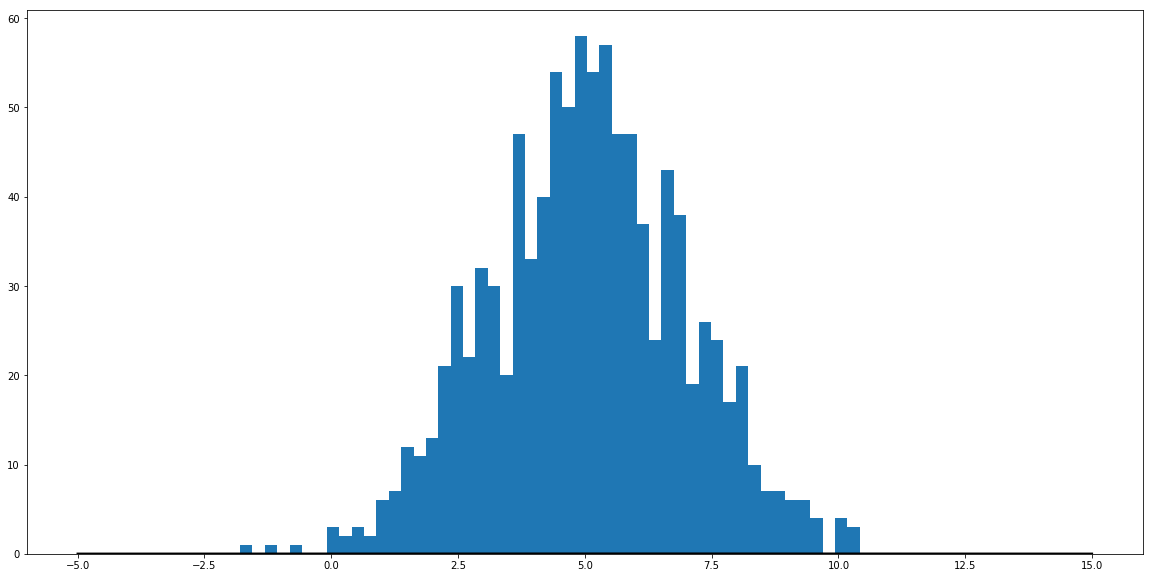

In [21]:
# your solution here

G=np.genfromtxt('histogram_exercise.dat').T
mu, sigma = norm.fit(G)
x = np.linspace(-5,15, 500)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(20,10))
plt.plot(x, pdf, 'k-', linewidth=2)
plt.hist(G,bins=50)

#### Exercise 2

Create a 1D interpolation along these arrays. Plot both the data (as points) and the interpolation (as a dotted line). Also plot the value of the interpolated function at x=325. What does the function look like to you?

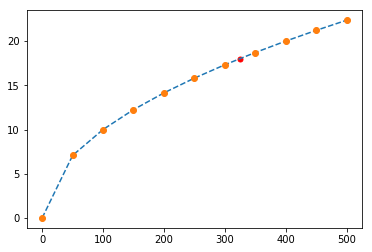

In [34]:
from scipy.interpolate import interp1d
x = np.array([0., 50., 100., 150., 200., 250., 300., 350., 400., 450., 500])
y = np.array([0., 7.071, 10., 12.247, 14.142, 15.811, 17.321, 18.708, 20., 21.213, 22.361])

# solution here
interp=interp1d(x,y)
xnew=np.linspace(0,500,100)
ynew=interp(xnew)
x_again=325
y_again=interp(x_again)

plt.plot(x_again,y_again,'or',markersize=5)
plt.plot(xnew,ynew,'--')
plt.plot(x,y,'o')

### Day 4

#### Exercise 1

Let's practice some more plotting skills, now incorporating units. 

A. Write a function that takes an array of frequencies and spits out the Planck distribution. That's this equation:

$$ B(\nu, T) = \frac{2h\nu^3/c^2}{e^{\frac{h\nu}{k_B T}} - 1} $$

This requires you to use the Planck constant, the Boltzmann constant, and the speed of light from astropy. Make sure they are all in cgs. 
    
B. Plot your function in log-log space for T = 25, 50, and 300 K. The most sensible frequency range is about 10^5 to 10^15 Hz. Hint: if your units are correct, your peak values of B(T) should be on the order of 10^-10. Make sure everything is labelled. 

In [ ]:
# solution here

#### Exercise 2

Let's put everything together now! Here's a link to the full documentation for FITSFigure, which will tell you all of the customizable options: http://aplpy.readthedocs.io/en/stable/api/aplpy.FITSFigure.html. Let's create a nice plot of M51 with a background optical image and X-ray contours overplotted.

The data came from here if you're interested: http://chandra.harvard.edu/photo/openFITS/multiwavelength_data.html

A. Using astropy, open the X-RAY data (m51_xray.fits). Flatten the data array and find its standard deviation, and call it sigma.

B. Using aplpy, plot a colorscale image of the OPTICAL data. Choose a colormap that is visually appealing (list of them here: https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html). Show the colorbar. 

C. Plot the X-ray data as contours above the optical image. Make the contours spring green with 80% opacity and dotted lines. Make the levels go from 2$\sigma$ to 10$\sigma$ in steps of 2$\sigma$. (It might be easier to define the levels array before show_contours, and set levels=levels.)

In [ ]:
# solution here